In [308]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [309]:
class Module():
    def __init__(self,module):
        module = module.split('|')
        self.name = module[0]
        self.staff = module[1]
        self.labs = module[2]
        self.constraints = module[3].split(',')
        
    def isin(self,mod):
        p

f = open('Modules.txt','r')
modules = []
line = f.readline()
while line:
    modules.append(Module(line))
    line = f.readline()
f.close()

In [310]:
def generate_random_timetable(modules):
    timetable = np.full((20,3),Module("None|None|None|None,None"),dtype=Module)
    totalmodules = modules
    
    for i in modules:
        totalmodules = totalmodules + ([i]*int(i.labs))
        
    k = 0
    for i in range(len(timetable)):
        for j in range(len(timetable[i])):
            timetable[i][j] = totalmodules[k]
            k = k+1
            if k>=len(totalmodules):
                break
        if k>=len(totalmodules):
                break
                
    timetable = timetable.flatten()
    np.random.shuffle(timetable)
    timetable = np.reshape(timetable,(20,3))
    return timetable



In [311]:
def checkConcurrence(li):
    count = 0
    #Checks if module is against another module that clashes.
    if li[0].name in li[1].constraints or li[0].name in li[2].constraints:
        count = count + 1
    if li[1].name in li[2].constraints or li[1].name in li[0].constraints:
        count = count + 1
    if li[2].name in li[0].constraints or li[2].name in li[1].constraints:
        count = count + 1
    
    #Checks if one module is being held at the same time in different rooms.
    if li[0].name==li[1].name:
        count = count + 1
    if li[1].name==li[2].name:
        count = count + 1
    if li[2].name==li[0].name:
        count = count + 1
    
    return count

def checkPrecedence(li):
    count = 0
    for i in range(len(li)):
        lecture = li[i][0].name
        if lecture == None:
            continue
        for j in range(0,i):
            if lecture == li[j][1].name:
                count = count + 1
            if lecture == li[j][2].name:
                count = count + 1
    return count


def fitness(timetable):
    precedence = checkPrecedence(timetable)
    
    concurrence = 0
    for i in timetable:
        concurrence = concurrence + checkConcurrence(i)
    
    return precedence * concurrence
        
timetable = generate_random_timetable(modules)
print(fitness(timetable))

1353


In [312]:
def compare_fitness(child,parent):
    return child<=parent

In [313]:
def ruin_and_recreate(timetable):
    timetable = generate_random_timetable(modules)
    return timetable

In [314]:
def session_replace(timetable):
    row = np.random.randint(0,20,2)
    col = np.random.randint(0,3,2)
    t = timetable[row[0]][col[0]]
    timetable[row[0]][col[0]] = timetable[row[1]][col[1]]
    timetable[row[1]][col[1]] = t
    return timetable

In [315]:
def hillclimber(Niter, problem, D, generate, mutation, comparison):
    #comparison is to compare fitness
    #problem is fitness
    parent = generate(D)
    parent_fitness = problem(parent)
    fitness_list = [parent_fitness]
    
    for i in range(Niter):
        #Mutate
        child = mutation(parent)
        
        #Evaluate
        child_fitness = problem(child)
        
        #Pick next parent solution
        if comparison(child_fitness,parent_fitness):
            parent = child
            parent_fitness = child_fitness
            fitness_list.append(child_fitness)
        else:
            fitness_list.append(parent_fitness)
            
    return parent, fitness_list


ruin_and_recreate_fitnesses = []
session_replace_fitnesses = []
for i in range(30):
    optimised_timetable, fitnesslist = hillclimber(500,fitness,modules,generate_random_timetable,ruin_and_recreate,compare_fitness)
    ruin_and_recreate_fitnesses.append(fitnesslist)
    
    optimised_timetable, fitnesslist = hillclimber(500,fitness,modules,generate_random_timetable,session_replace,compare_fitness)
    session_replace_fitnesses.append(fitnesslist)


In [316]:
final_ruin_fitnesses = []
final_swap_fitnesses = []

for i in ruin_and_recreate_fitnesses:
    final_ruin_fitnesses.append([max(i),(sum(i)/len(i)),min(i)])
    
for i in session_replace_fitnesses:
    final_swap_fitnesses.append([max(i),(sum(i)/len(i)),min(i)])

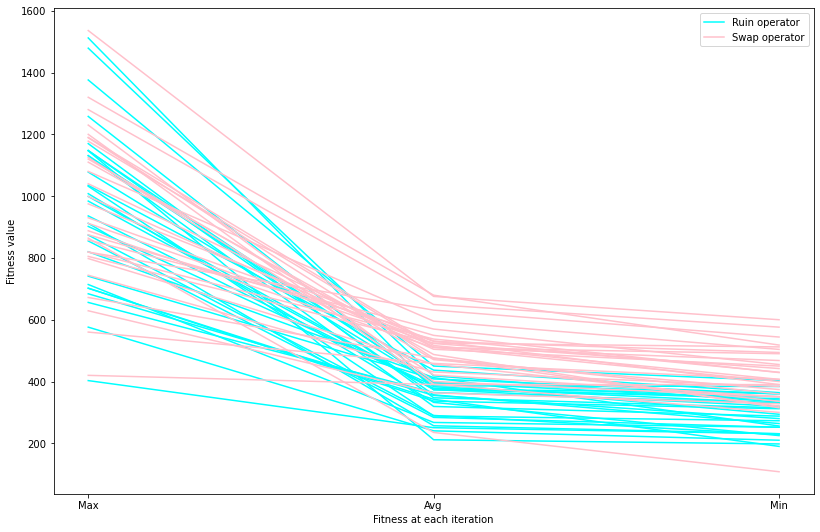

In [317]:
X = ['Max','Avg','Min']

plt.plot(X,final_ruin_fitnesses[0],color='cyan',label="Ruin operator")
for i in final_ruin_fitnesses[1:]:
    plt.plot(X,i,color='cyan')
    
plt.plot(X,final_swap_fitnesses[0],color='pink',label="Swap operator")
for i in final_swap_fitnesses[1:]:
    plt.plot(X,i,color='pink')

    
plt.rcParams["figure.figsize"] = [11.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.legend(loc="upper right")
plt.xlabel('Fitness at each iteration')
plt.ylabel('Fitness value')
plt.show()